In [1]:
import gudhi as gd
print(gd.__version__)

3.6.0


In [2]:
from sklearn import datasets
circles, labels = datasets.make_circles(n_samples=100, noise=0.06, factor=0.5)
print('Data dimension:{}'.format(circles.shape))

Data dimension:(100, 2)


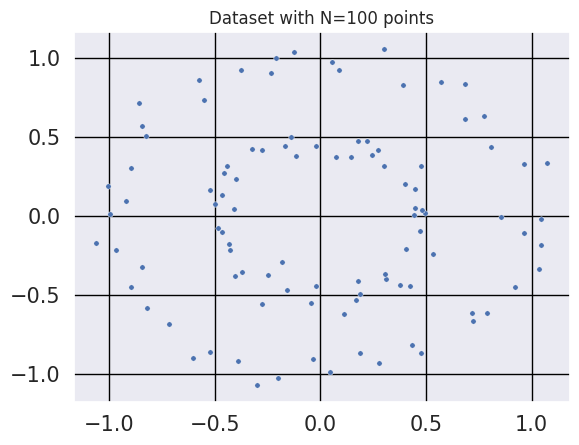

In [4]:
import matplotlib.pyplot as plt; 
import seaborn as sns
sns.set()

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x=circles[:,0], y=circles[:,1],   s=15)
plt.title('Dataset with N=%s points'%(circles.shape[0]))
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('circles2.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [5]:
%%time
# The RipsComplex() function creates a one skeleton graph from the point cloud.
Rips_complex = gd.RipsComplex(circles, max_edge_length=0.6) 

CPU times: user 96 µs, sys: 92 µs, total: 188 µs
Wall time: 190 µs


In [6]:
%%time
# The create_simplex_tree() method creates the filtered complex.
Rips_simplex_tree = Rips_complex.create_simplex_tree(max_dimension=3) 

CPU times: user 548 µs, sys: 520 µs, total: 1.07 ms
Wall time: 631 µs


In [7]:
%%time
# The get_filtration() method computes the simplices of the filtration
filt_Rips = list(Rips_simplex_tree.get_filtration())

CPU times: user 6.45 ms, sys: 0 ns, total: 6.45 ms
Wall time: 6.42 ms


In [8]:
import numpy as np

eps = 0.15
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])

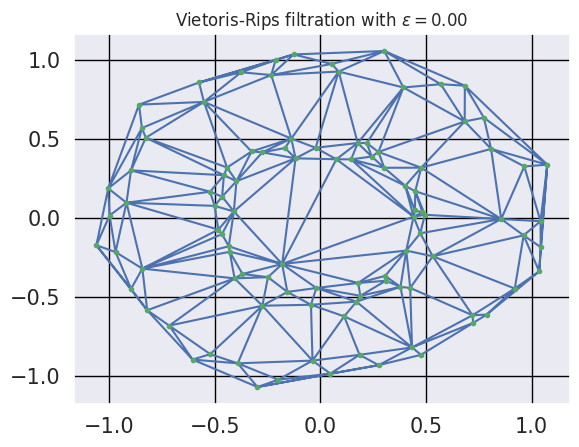

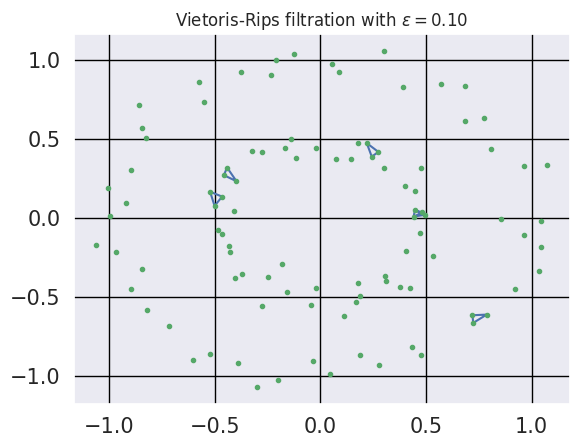

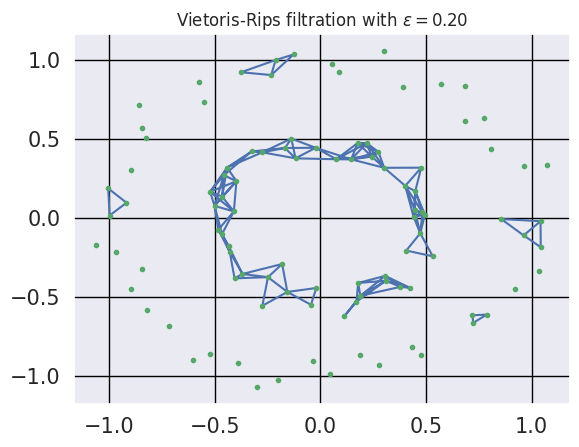

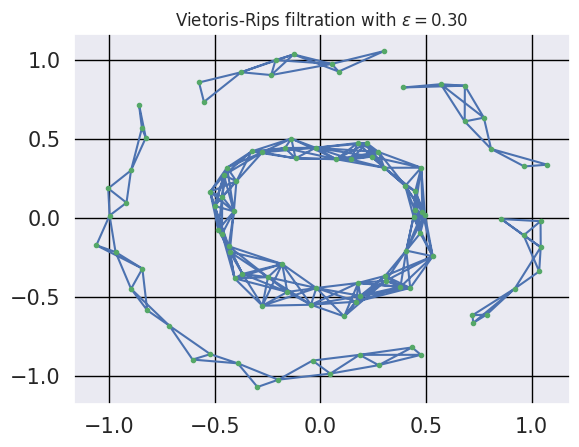

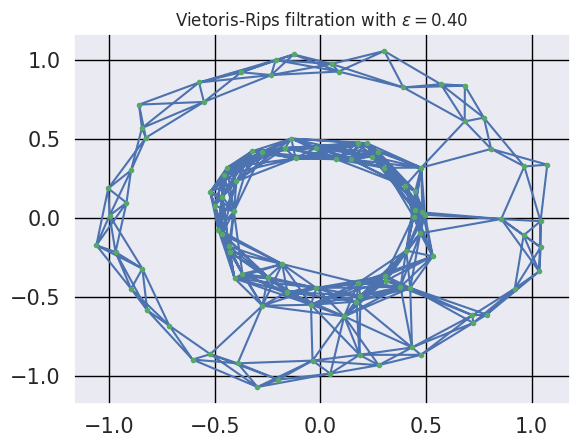

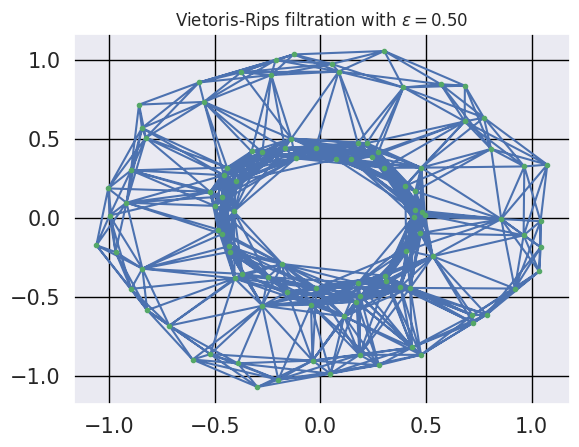

In [9]:
for eps in np.linspace(0, 0.5, 6):

    triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
    plt.triplot(circles[:,0], circles[:,1], triangles)
    plt.plot(circles[:,0], circles[:,1], '.')
    plt.title(f"Vietoris-Rips filtration with $\epsilon={eps:.2f}$")
    plt.grid(color = 'black', linestyle = '-', linewidth = 1)
    plt.savefig(f'filtration{int(eps*100):03}.png' , dpi=600, transparent=True)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()


In [ ]:

plt.triplot(circles[:,0], circles[:,1], triangles)
plt.plot(circles[:,0], circles[:,1], '.')
plt.title("Vietoris-Rips filtration with $\epsilon=0.15$")
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('filtration15.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
eps = 0.2
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
plt.triplot(circles[:,0], circles[:,1], triangles)
plt.plot(circles[:,0], circles[:,1], '.')
plt.title("Vietoris-Rips filtration $\epsilon=0.2$")
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('filtration2.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
eps = 0.3
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
plt.triplot(circles[:,0], circles[:,1], triangles)
plt.plot(circles[:,0], circles[:,1], '.')
plt.title("Vietoris-Rips filtration $\epsilon=0.3$")
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('filtration3.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
%%time
# We can compute persistence on the simplex tree structure using the persistence() method
diag_Rips = Rips_simplex_tree.persistence()

In [ ]:
%%time
gd.plot_persistence_diagram(diag_Rips,legend=True)
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('persitencediagramCircles.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)

In [ ]:
%%time
gd.plot_persistence_barcode(v,legend=True)
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('persistencebarcodeCircles' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
